## The dataset has been taken from https://www.data.gov/

### The link of the dataset is https://catalog.data.gov/dataset/domain-and-hwbi-scores-for-cwbi

### The data represents scores for each of the Parameter viz Social Cohesion, Living Standard, Education, Connection to Nature, Cultural Fulfillment, Health, Safety and Security, Leisure Time and CWBI. It is represented as per County Name and Map.

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn
import math
import missingno

# Machine learning

#Regression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor as GBR

# Machine learning - Classification
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import StandardScaler
# Let's be rebels and ignore warnings for now
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading the file. Converting it to the Pandas DataFrame data type

In [4]:
df=pd.read_csv("F:/ML assignment/cwbi_data.csv")

In [5]:
df.head()

,MAP,GEOID,County Name,Social Cohesion,Living Standard,Education,Connection to Nature,Cultural Fulfillment,Health,Safety and Security,Leisure Time,CWBI
0,0500000US01001,1001,"Autauga County, Alabama",0.497672,0.527313,0.601218,0.285606,0.411202,0.593465,0.480765,0.537083,0.480457
1,0500000US01003,1003,"Baldwin County, Alabama",0.515415,0.520333,0.605684,0.299313,0.423210,0.600268,0.517413,0.537675,0.492049
2,0500000US01005,1005,"Barbour County, Alabama",0.520115,0.458998,0.612245,0.333321,0.453001,0.576690,0.653459,0.539146,0.508696
3,0500000US01007,1007,"Bibb County, Alabama",0.521704,0.472076,0.615875,0.356080,0.472938,0.564400,0.507001,0.540131,0.500664
4,0500000US01009,1009,"Blount County, Alabama",0.513746,0.519625,0.605228,0.276825,0.403510,0.595946,0.500904,0.536703,0.481547


# Dropping Columns MAP, GEOID, County Name and CWBI

In [6]:
df.drop('MAP',axis=1,inplace=True)
df.drop('GEOID',axis=1,inplace=True)
df.drop('County Name',axis=1,inplace=True)
df.drop('CWBI',axis=1,inplace=True)

In [7]:
df.head()

,Social Cohesion,Living Standard,Education,Connection to Nature,Cultural Fulfillment,Health,Safety and Security,Leisure Time
0,0.497672,0.527313,0.601218,0.285606,0.411202,0.593465,0.480765,0.537083
1,0.515415,0.520333,0.605684,0.299313,0.423210,0.600268,0.517413,0.537675
2,0.520115,0.458998,0.612245,0.333321,0.453001,0.576690,0.653459,0.539146
3,0.521704,0.472076,0.615875,0.356080,0.472938,0.564400,0.507001,0.540131
4,0.513746,0.519625,0.605228,0.276825,0.403510,0.595946,0.500904,0.536703


In [8]:
col = df.columns

# Data Preprocessing and Exploration


## 1. Converting the values in each column to fload data type

In [9]:
for c in col:
    df[c].map(lambda x:float(x))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 8 columns):
Social Cohesion         3143 non-null float64
Living Standard         3143 non-null float64
Education               3143 non-null float64
Connection to Nature    3143 non-null float64
Cultural Fulfillment    3143 non-null float64
Health                  3143 non-null float64
Safety and Security     3143 non-null float64
Leisure Time            3143 non-null float64
dtypes: float64(8)
memory usage: 196.6 KB


# Checking the dataset for missing values using Missing value Matrix

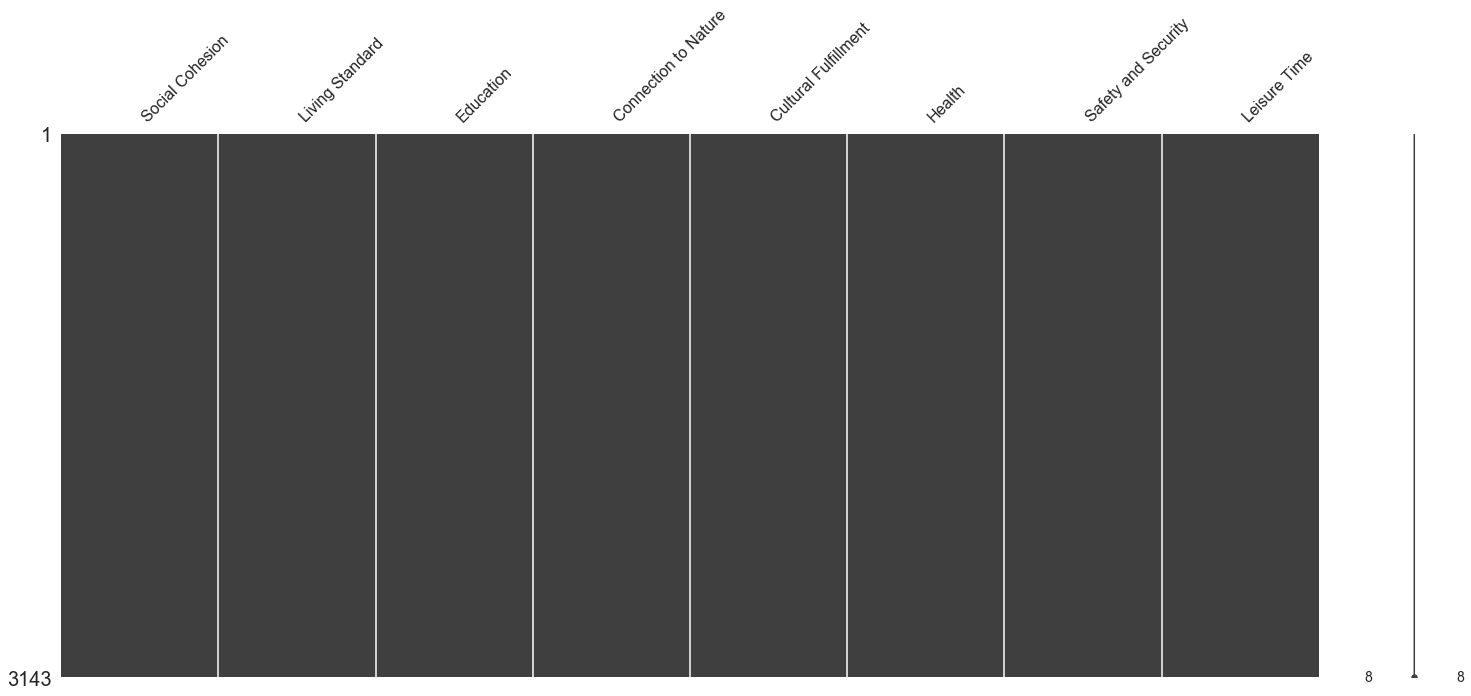

In [11]:
missingno.matrix(df)

In [12]:
df.columns

Index(['Social Cohesion', 'Living Standard', 'Education',
       'Connection to Nature', 'Cultural Fulfillment', 'Health',
       'Safety and Security', 'Leisure Time'],
      dtype='object')

# No missing values Found

## Checking the shape of the DataFrame

## Rows : 3143
## Columns: 8

In [13]:
df.shape

(3143, 8)

# Variable Identification

## Dependent Variables / Predictor Variable
## Independent Variable / Target Variable

In [14]:
y=df.filter(['Health'],axis=1)
X=df.drop(['Health'],axis=1)

In [15]:
features = X.columns

In [16]:
features

Index(['Social Cohesion', 'Living Standard', 'Education',
       'Connection to Nature', 'Cultural Fulfillment', 'Safety and Security',
       'Leisure Time'],
      dtype='object')

# Univariate Analysis

In [17]:
X.describe()

,Social Cohesion,Living Standard,Education,Connection to Nature,Cultural Fulfillment,Safety and Security,Leisure Time
count,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,0.555634,0.510465,0.539788,0.258880,0.393917,0.600952,0.497981
std,0.056169,0.049009,0.060496,0.157890,0.060033,0.085852,0.045483
min,0.414518,0.327033,0.380467,0.100000,0.228217,0.368269,0.359123
25%,0.514034,0.479128,0.493979,0.149674,0.349791,0.535843,0.479081
50%,0.548428,0.515002,0.547970,0.207500,0.390253,0.597787,0.497009
75%,0.602767,0.544407,0.587194,0.302153,0.437603,0.666351,0.535998
max,0.715401,0.680962,0.656756,0.900000,0.661325,0.820143,0.591937


Text(0.5, 1.0, 'Social Cohesion')

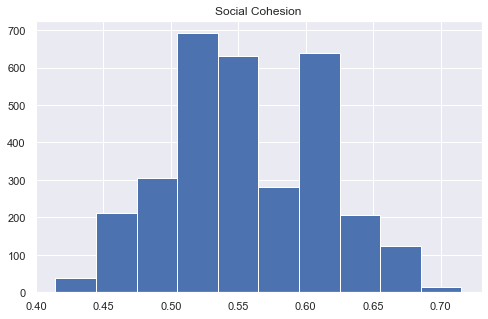

In [18]:

plt.figure(figsize=(8,5))
plt.hist(X['Social Cohesion']);
plt.title('Social Cohesion')

Text(0.5, 1.0, 'Living Standard')

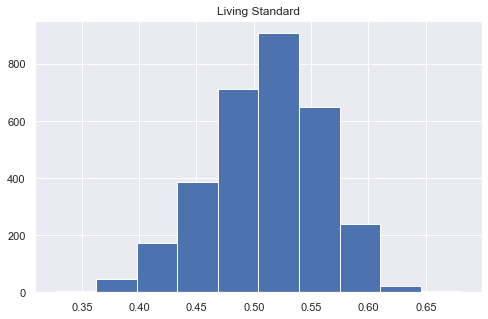

In [19]:
plt.figure(figsize=(8,5))
plt.hist(X[features[1]]);
plt.title(features[1])

Text(0.5, 1.0, 'Education')

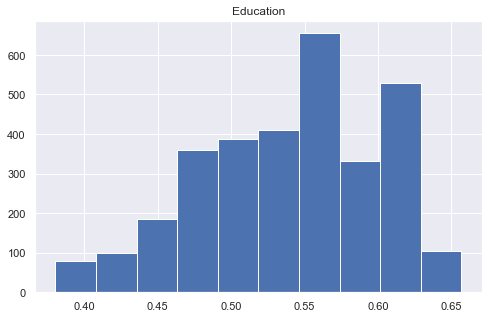

In [20]:
plt.figure(figsize=(8,5))
plt.hist(X[features[2]]);
plt.title(features[2])

Text(0.5, 1.0, 'Connection to Nature')

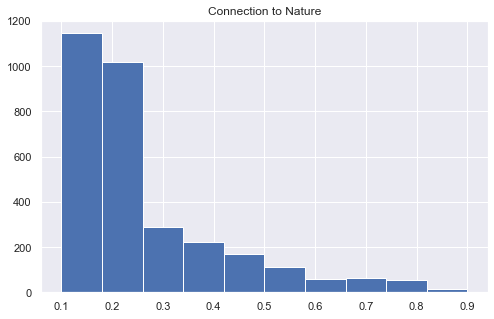

In [21]:
plt.figure(figsize=(8,5))
plt.hist(X[features[3]]);
plt.title(features[3])

Text(0.5, 1.0, 'Cultural Fulfillment')

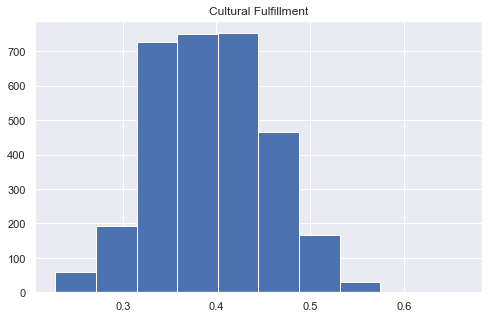

In [22]:
plt.figure(figsize=(8,5))
plt.hist(X[features[4]]);
plt.title(features[4])

Text(0.5, 1.0, 'Safety and Security')

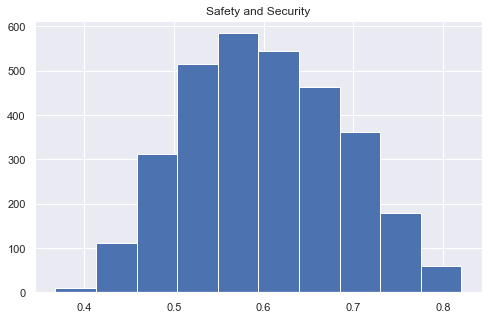

In [23]:
plt.figure(figsize=(8,5))
plt.hist(X[features[5]]);
plt.title(features[5])

Text(0.5, 1.0, 'Leisure Time')

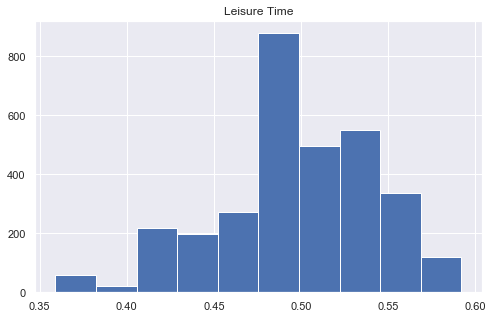

In [24]:
plt.figure(figsize=(8,5))
plt.hist(X[features[6]]);
plt.title(features[6])

In [25]:
# Box plot to check outlier

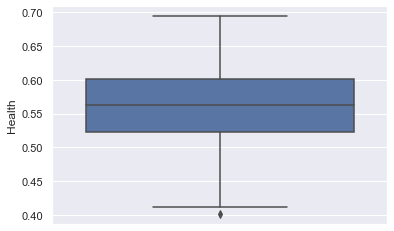

In [26]:
sns.boxplot(y=y['Health']);

# Bivariate Analysis

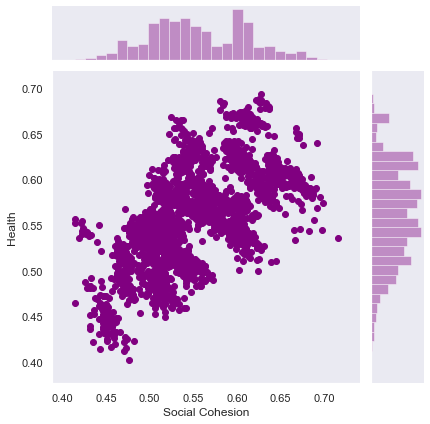

In [27]:
sns.set_style("dark")
sns.jointplot(x=X[features[0]], y=y['Health'], kind="scatter",color="purple");

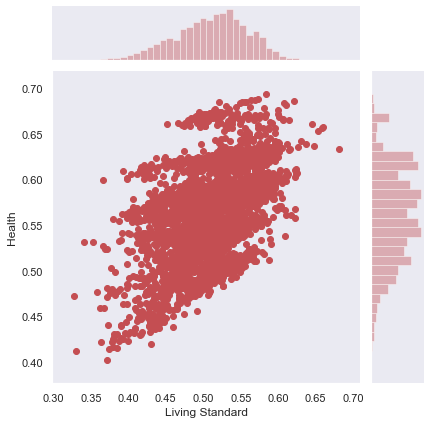

In [28]:
sns.jointplot(x=X[features[1]], y=y['Health'], kind="scatter", color="r");

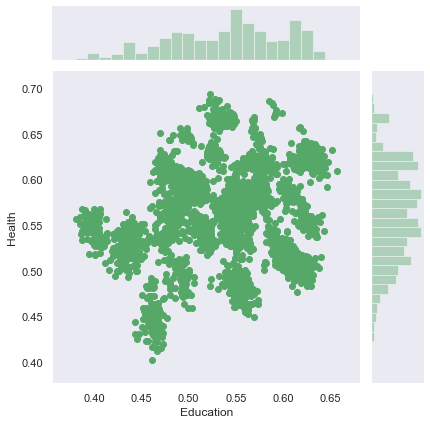

In [29]:
sns.jointplot(x=X[features[2]], y=y['Health'], kind="scatter", color="g");

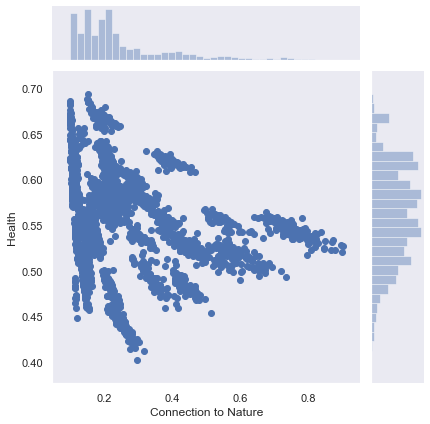

In [30]:
sns.jointplot(x=X[features[3]], y=y['Health'], kind="scatter", color="b");

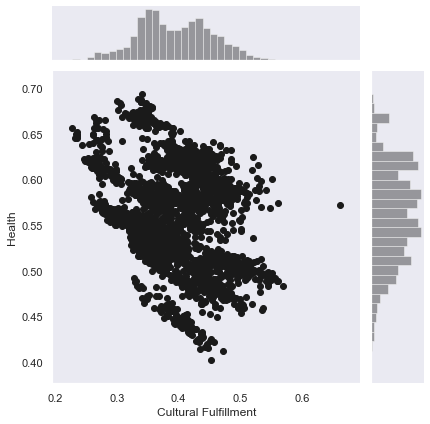

In [31]:
sns.jointplot(x=X[features[4]], y=y['Health'], kind="scatter", color="k");

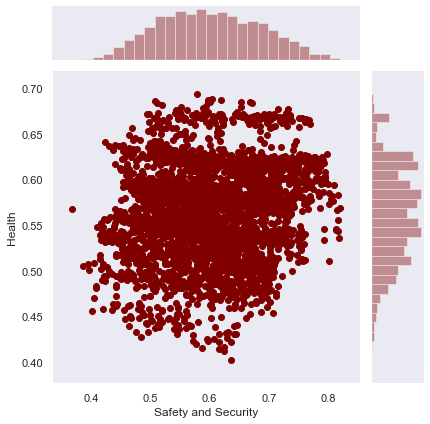

In [32]:
sns.jointplot(x=X[features[5]], y=y['Health'], kind="scatter", color="maroon");

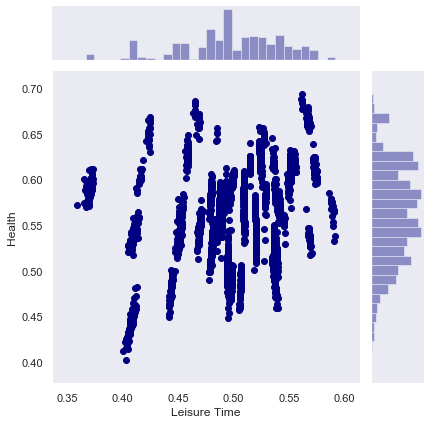

In [33]:
sns.jointplot(x=X[features[6]], y=y['Health'], kind="scatter", color="navy");

# Checking Correlation

In [34]:
df.corr().apply(lambda x:round(x*100,0))

,Social Cohesion,Living Standard,Education,Connection to Nature,Cultural Fulfillment,Health,Safety and Security,Leisure Time
Social Cohesion,100.0,50.0,10.0,-28.0,7.0,63.0,39.0,34.0
Living Standard,50.0,100.0,10.0,-24.0,12.0,51.0,4.0,25.0
Education,10.0,10.0,100.0,-26.0,31.0,16.0,2.0,11.0
Connection to Nature,-28.0,-24.0,-26.0,100.0,-11.0,-25.0,-0.0,-9.0
Cultural Fulfillment,7.0,12.0,31.0,-11.0,100.0,-30.0,16.0,-2.0
Health,63.0,51.0,16.0,-25.0,-30.0,100.0,11.0,35.0
Safety and Security,39.0,4.0,2.0,-0.0,16.0,11.0,100.0,28.0
Leisure Time,34.0,25.0,11.0,-9.0,-2.0,35.0,28.0,100.0


# Heat map to visualise correlation

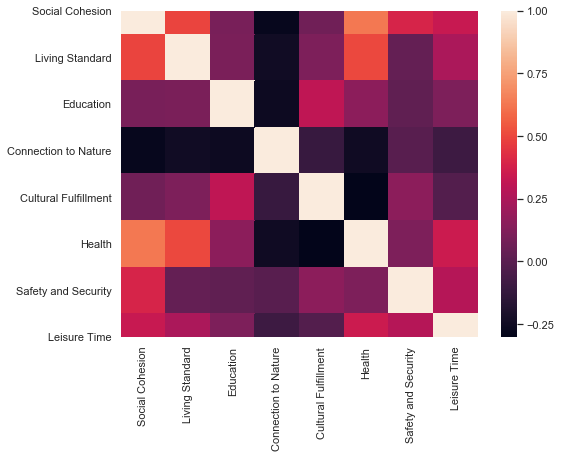

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())
plt.show()

# Carrying out scaler transformation for Linear regression

In [36]:
scaler = StandardScaler()
scaler_X= scaler.fit_transform(X)
X_new = pd.DataFrame(scaler_X, columns=features)
X_new.head()

,Social Cohesion,Living Standard,Education,Connection to Nature,Cultural Fulfillment,Safety and Security,Leisure Time
0,-1.032083,0.343816,1.015601,0.169298,0.287973,-1.400166,0.859827
1,-0.716143,0.201374,1.089434,0.256127,0.488022,-0.973225,0.872864
2,-0.632458,-1.050321,1.197905,0.471551,0.984344,0.611698,0.905210
3,-0.604168,-0.783437,1.257927,0.615716,1.316490,-1.094525,0.926856
4,-0.745865,0.186929,1.081904,0.113675,0.159821,-1.165551,0.851475


# Visualising the features after Scaling

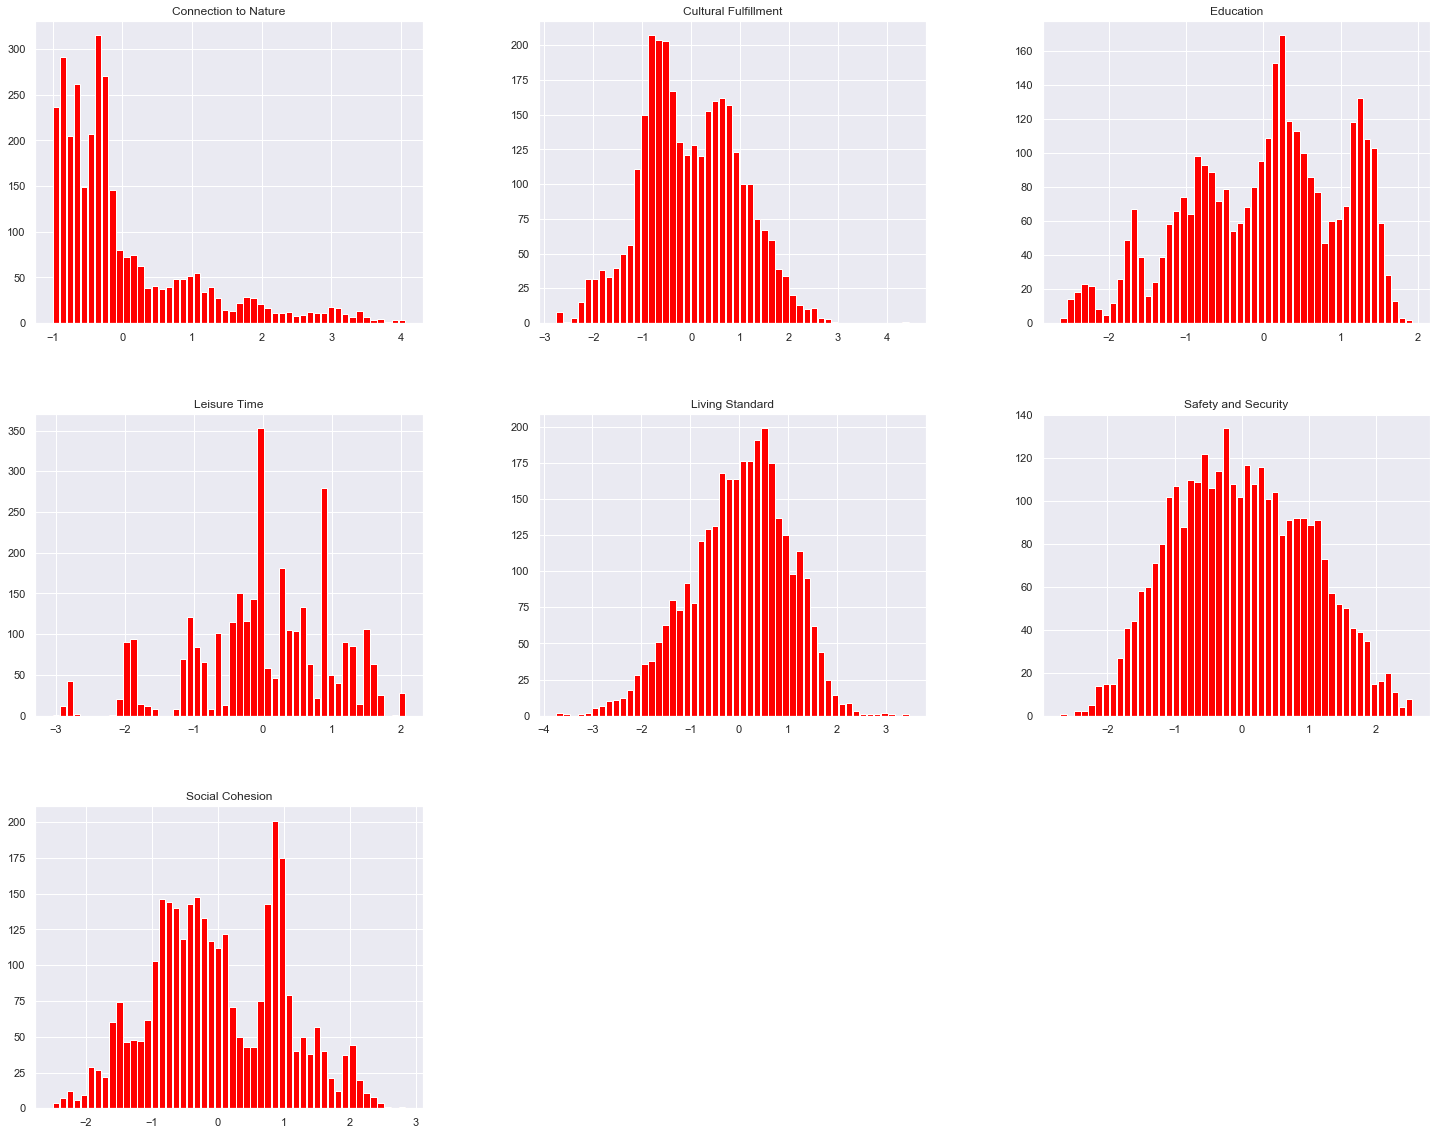

In [37]:
X_new.hist(bins=50,rwidth=0.9,figsize=(25,20),color='red');

# Checking correlations between the features

In [38]:
correlated_features = set()
correlation_matrix = X_new.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [39]:
correlated_features

set()

# As correlates features is empty. There are no Correlated features

In [40]:
model = LinearRegression()
rfe = RFE(model, 5)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_new,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True False  True]
[1 1 1 3 1 2 1]


                      Social Cohesion  Living Standard  Education  \
Social Cohesion              1.000000         0.496064   0.096151   
Living Standard              0.496064         1.000000   0.102665   
Education                    0.096151         0.102665   1.000000   
Connection to Nature        -0.277822        -0.243263  -0.256995   
Cultural Fulfillment         0.074110         0.115152   0.313921   
Safety and Security          0.393347         0.035709   0.023265   
Leisure Time                 0.335634         0.250732   0.110792   

                      Connection to Nature  Cultural Fulfillment  \
Social Cohesion                  -0.277822              0.074110   
Living Standard                  -0.243263              0.115152   
Education                        -0.256995              0.313921   
Connection to Nature              1.000000             -0.109952   
Cultural Fulfillment             -0.109952              1.000000   
Safety and Security              -0.003

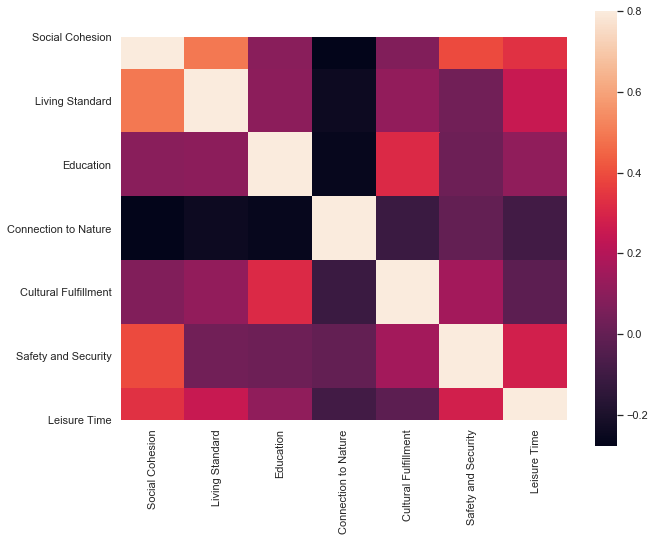

In [41]:
corrmat = X_new.corr()
f, ax = plt.subplots(figsize=(10, 8))
print(corrmat)
sns.heatmap(corrmat, vmax=.8, square=True);

# Splitting the Data into train and test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 10)

# Function to check Performance

In [43]:
# Function that runs the requested algorithm and returns the accuracy metrics
def performance(algo):
    
    algo.fit(X_train,y_train)
    print("Score:",algo.score(X_test, y_test))
    y_pred= algo.predict(X_test)
    algo_mse = mean_squared_error(y_pred, y_test)
    print("Mean squared Error:",algo_mse)
    print("Square root MSE:",math.sqrt(algo_mse))

# Linear Regression

In [44]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
print("Score:",lin_reg.score(X_test, y_test))
y_pred= lin_reg.predict(X_test)
algo_mse = mean_squared_error(y_pred, y_test)
print("Mean squared Error:",algo_mse)
print("Square root MSE:",math.sqrt(algo_mse))

Score: 0.6544066685186052
Mean squared Error: 0.0009709655619630247
Square root MSE: 0.03116032031226612


# Linear Equation

In [45]:
#To retrieve the intercept:
print("Intercept:",lin_reg.intercept_)
#For retrieving the slope:
print(pd.DataFrame(lin_reg.coef_,columns=features))

Intercept: [0.17940857]
   Social Cohesion  Living Standard  Education  Connection to Nature  \
0         0.472449          0.26853   0.175009             -0.011731   

   Cultural Fulfillment  Safety and Security  Leisure Time  
0             -0.367173            -0.035546      0.114717  



##### y=0.17940857 + (Social Cohesion*0.472449) + (Living Standard * 0.26853) + (Education * 0.175009) + (Connection to Nature * -0.011731) 
##### + (Cultural Fulfillment * -0.367173) + (Safety and Security * -0.035546) + (Leisure Time * 0.114717)

# Gradient Boost Regressor

In [46]:
params = {'n_estimators' : 150, 'max_depth':6, 'learning_rate': 1,'criterion':'mse'}
performance(GBR(**params))


Score: 0.9454604917188086
Mean squared Error: 0.00015323207794674972
Square root MSE: 0.012378694517062359


# Hence we choose Gradient Boost Regressor for Regression

# Classification

In [47]:
data=pd.read_csv("F:/ML assignment/cwbi_data.csv")

In [48]:
data.head()

,MAP,GEOID,County Name,Social Cohesion,Living Standard,Education,Connection to Nature,Cultural Fulfillment,Health,Safety and Security,Leisure Time,CWBI
0,0500000US01001,1001,"Autauga County, Alabama",0.497672,0.527313,0.601218,0.285606,0.411202,0.593465,0.480765,0.537083,0.480457
1,0500000US01003,1003,"Baldwin County, Alabama",0.515415,0.520333,0.605684,0.299313,0.423210,0.600268,0.517413,0.537675,0.492049
2,0500000US01005,1005,"Barbour County, Alabama",0.520115,0.458998,0.612245,0.333321,0.453001,0.576690,0.653459,0.539146,0.508696
3,0500000US01007,1007,"Bibb County, Alabama",0.521704,0.472076,0.615875,0.356080,0.472938,0.564400,0.507001,0.540131,0.500664
4,0500000US01009,1009,"Blount County, Alabama",0.513746,0.519625,0.605228,0.276825,0.403510,0.595946,0.500904,0.536703,0.481547


## Columns MAP, GEOID and County Name are irrelevant. Hence we drop the three columns

In [49]:
data.drop('MAP',axis=1,inplace=True)
data.drop('GEOID',axis=1,inplace=True)
data.drop('County Name',axis=1,inplace=True)

## Finding correlation between the features. Converting correlation to Percentages.

In [50]:
data.corr().apply(lambda x:round(x*100,0))

,Social Cohesion,Living Standard,Education,Connection to Nature,Cultural Fulfillment,Health,Safety and Security,Leisure Time,CWBI
Social Cohesion,100.0,50.0,10.0,-28.0,7.0,63.0,39.0,34.0,38.0
Living Standard,50.0,100.0,10.0,-24.0,12.0,51.0,4.0,25.0,24.0
Education,10.0,10.0,100.0,-26.0,31.0,16.0,2.0,11.0,14.0
Connection to Nature,-28.0,-24.0,-26.0,100.0,-11.0,-25.0,-0.0,-9.0,61.0
Cultural Fulfillment,7.0,12.0,31.0,-11.0,100.0,-30.0,16.0,-2.0,27.0
Health,63.0,51.0,16.0,-25.0,-30.0,100.0,11.0,35.0,17.0
Safety and Security,39.0,4.0,2.0,-0.0,16.0,11.0,100.0,28.0,47.0
Leisure Time,34.0,25.0,11.0,-9.0,-2.0,35.0,28.0,100.0,40.0
CWBI,38.0,24.0,14.0,61.0,27.0,17.0,47.0,40.0,100.0


## Finding the minimum and maximum value of target variable Living Standard

In [51]:
data['Living Standard'].describe()

count    3143.000000
mean        0.510465
std         0.049009
min         0.327033
25%         0.479128
50%         0.515002
75%         0.544407
max         0.680962
Name: Living Standard, dtype: float64

## Converting Living standard column into 3 Bins of equal intervals
## Using labels (0,1,2) as Low, Medium & High Living Standard

In [52]:
data['stl_cat']=pd.cut(data['Living Standard'], bins=3,labels=(0,1,2))

## Getting Value count of each category

In [53]:
data['stl_cat'].value_counts()

1    2366
2     448
0     329
Name: stl_cat, dtype: int64

In [54]:
data.drop('Living Standard',axis=1,inplace=True)

In [55]:
data['stl_cat'].head()

0    1
1    1
2    1
3    1
4    1
Name: stl_cat, dtype: category
Categories (3, int64): [0 < 1 < 2]

## Creating X and y : Predictor and Target Variable

In [56]:
y=data.filter(['stl_cat'],axis=1)
X=data.drop(['stl_cat'],axis=1)

## Spliting data into train and test

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 10)

## Function that runs the requested algorithm and returns the accuracy metrics

In [58]:

def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

## Logistic Regression

In [59]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 75.06
Accuracy CV 10-Fold: 75.06


## K-Nearest Neighbours

In [60]:
data.columns
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Accuracy: 90.45
Accuracy CV 10-Fold: 86.71


## Gaussian Naive Bayes

In [61]:

train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)

Accuracy: 69.17
Accuracy CV 10-Fold: 69.33


## Linear SVC

In [62]:

train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)

Accuracy: 75.86
Accuracy CV 10-Fold: 75.7


## Stochastic Gradient Descent

In [63]:

train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)

Accuracy: 75.89
Accuracy CV 10-Fold: 75.54


## Decision Tree Classifier

In [64]:

train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Accuracy: 100.0
Accuracy CV 10-Fold: 83.37


## Gradient Boosting Trees

In [65]:

train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)

Accuracy: 93.48
Accuracy CV 10-Fold: 86.52


# Cross validation Accuracy is highest for K-Nearest Neighbours which is 86.71%

# Hence we choose for K-Nearest Neighbours